#Chart Image Classification using CNN

Problem statement: You have to develop a CNN based classification architecture for classifying a given chart image to one of five chart classes, namely “Line”,“Dot Line”,“Horizontal
Bar”,“Vertical Bar”, and “Pie” chart.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import array_to_img, img_to_array, load_img
from keras import regularizers, optimizers
from keras import backend as K

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
#Mount google drive and load the CSV file
#Ref https://stackoverflow.com/questions/59464409/loading-images-in-keras-for-cnn-from-directory-but-label-in-csv-file?noredirect=1&lq=1
from google.colab import drive
#drive.mount('/content/drive')
path = "/content/drive/MyDrive/DataScienceProjects/Chart_Image_Classification_CNN/charts/train_val.csv"
traindf = pd.read_csv(path,dtype=str)
traindf
#traindf=pd.read_csv('../input/humpback-whale-identification/train.csv',dtype=str)

,image_index,type
0,0,vbar_categorical
1,1,vbar_categorical
2,2,vbar_categorical
3,3,vbar_categorical
4,4,vbar_categorical
...,...,...
995,995,dot_line
996,996,dot_line
997,997,dot_line
998,998,dot_line


In [10]:
def append_ext(fn):
    return fn+".png"

traindf["image_index"]=traindf["image_index"].apply(append_ext)

In [11]:
traindf.head()

,image_index,type
0,0.png,vbar_categorical
1,1.png,vbar_categorical
2,2.png,vbar_categorical
3,3.png,vbar_categorical
4,4.png,vbar_categorical


In [13]:
datagen=ImageDataGenerator(
    rescale=1./255.,
    validation_split=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [14]:
train_generator=datagen.flow_from_dataframe(
dataframe=traindf,
directory="/content/drive/MyDrive/DataScienceProjects/Chart_Image_Classification_CNN/charts/train_val/",
x_col="image_index",
y_col="type",
subset="training",
batch_size=8,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(128,128))

Found 800 validated image filenames belonging to 5 classes.


In [15]:
validation_generator=datagen.flow_from_dataframe(
dataframe=traindf,
directory="/content/drive/MyDrive/DataScienceProjects/Chart_Image_Classification_CNN/charts/train_val/",
x_col="image_index",
y_col="type",
subset="validation",
batch_size=32,
seed=42,
shuffle=True,
class_mode="categorical",
target_size=(128,128))

Found 200 validated image filenames belonging to 5 classes.


Task 2: Implement a two-layer Convolutional Neural Network, and calculate accuracy,
loss and plot the obtained loss. Briefly write your observation and submit your code so that
we can4 evaluate your implementation at our end.

In [16]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3, 3),activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (5, 5)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

In [17]:
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation= 'relu' ))
#model.add(Dense(25, activation= 'relu' ))
model.add(Dense(5, activation= 'softmax' ))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 59, 59, 32)        12832     
                                                                 
 activation (Activation)     (None, 59, 59, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 59, 59, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 29, 29, 32)       0

In [18]:
# Compile model
#opt = optimizers.Adam(learning_rate=0.0001)
model.compile(loss= 'categorical_crossentropy' , optimizer='adam' , metrics=[ 'accuracy' ])

In [19]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  train_generator,
  validation_data=validation_generator,
  epochs=20,
  steps_per_epoch=len(train_generator),
  validation_steps=len(validation_generator)
)

<ipython-input-19-40b1631f4f54>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20
100/100 [==============================] - 194s 2s/step - loss: 1.7558 - accuracy: 0.7050 - val_loss: 10.9565 - val_accuracy: 0.0000e+00
Epoch 2/20
100/100 [==============================] - 7s 71ms/step - loss: 0.6483 - accuracy: 0.8325 - val_loss: 18.8180 - val_accuracy: 0.0000e+00
Epoch 3/20
100/100 [==============================] - 6s 64ms/step - loss: 0.6124 - accuracy: 0.8637 - val_loss: 17.6286 - val_accuracy: 0.0000e+00
Epoch 4/20
100/100 [==============================] - 6s 61ms/step - loss: 0.3316 - accuracy: 0.9275 - val_loss: 44.3751 - val_accuracy: 0.0000e+00
Epoch 5/20
100/100 [==============================] - 7s 73ms/step - loss: 0.2862 - accuracy: 0.9475 - val_loss: 40.4115 - val_accuracy: 0.0000e+00
Epoch 6/20
100/100 [==============================] - 6s 63ms/step - loss: 0.3128 - accuracy: 0.9325 - val_loss: 37.0642 - val_accuracy: 0.0000e+00
Epoch 7/20
100/100 [==============================] - 7s 74ms/step - loss: 0.2742 - accuracy: 0.9413 - val_loss:

In [20]:
import matplotlib.pyplot as plt

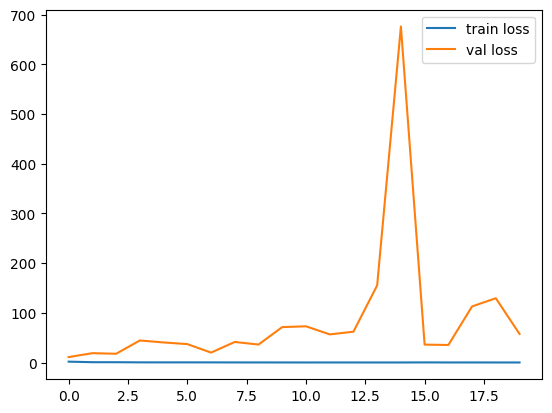

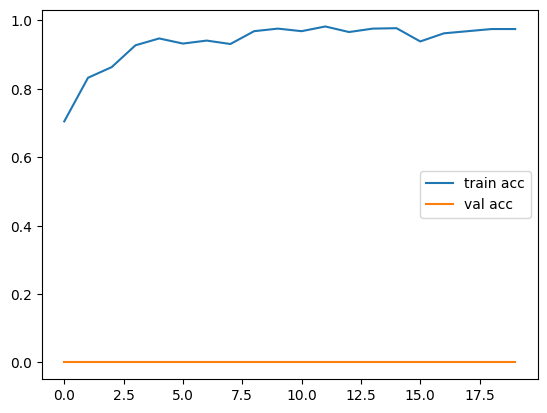

In [21]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

#Task 3: Finetune a pretrained network (e.g., AlexNet) for this task and report the results.

In [22]:
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input

In [23]:
# re-size all the images to this
IMAGE_SIZE = [128, 128]

# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  

58889256/58889256 [==============================] - 0s 0us/step


In [24]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(5, activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

Epoch 1/5
  1/100 [..............................] - ETA: 7s - loss: 2.3727e-04 - accuracy: 1.0000

<ipython-input-26-1fb456bc5616>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


100/100 [==============================] - 8s 75ms/step - loss: 0.0099 - accuracy: 0.9975 - val_loss: 16.0487 - val_accuracy: 0.0000e+00
Epoch 2/5
100/100 [==============================] - 6s 64ms/step - loss: 0.0079 - accuracy: 0.9987 - val_loss: 14.6041 - val_accuracy: 0.0000e+00
Epoch 3/5
100/100 [==============================] - 7s 74ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 15.1184 - val_accuracy: 0.0000e+00
Epoch 4/5
100/100 [==============================] - 6s 63ms/step - loss: 0.0051 - accuracy: 0.9987 - val_loss: 15.6818 - val_accuracy: 0.0000e+00
Epoch 5/5
100/100 [==============================] - 7s 74ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 14.8516 - val_accuracy: 0.0000e+00


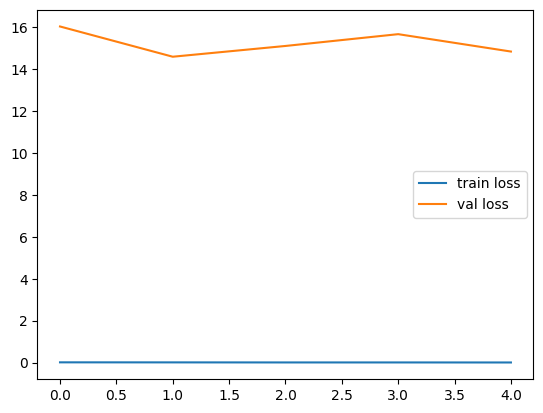

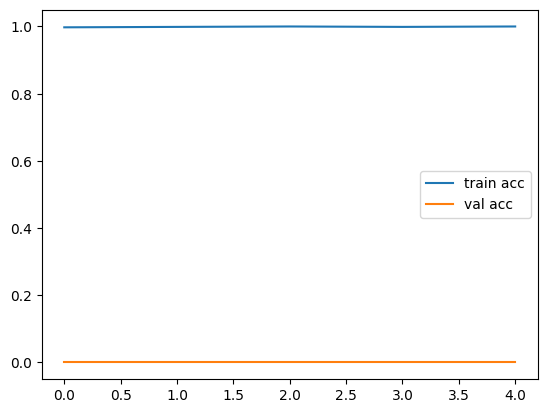

In [26]:
# fit the model
r = model.fit_generator(
  train_generator,
  validation_data=validation_generator,
  epochs=5,
  steps_per_epoch=len(train_generator),
  validation_steps=len(validation_generator)
)
# loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
#plt.savefig('LossVal_loss')

# accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')
